In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
import imutils
from imutils import face_utils
from scipy.spatial import distance as dist
from skimage.exposure import match_histograms

%matplotlib inline
datadir = "../../data"

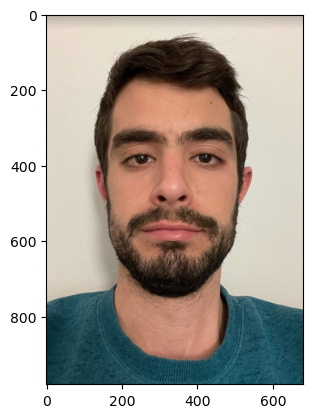

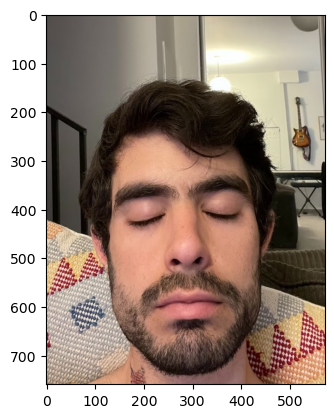

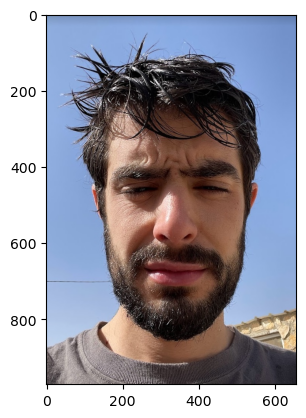

In [2]:
opened = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2RGB)
opened_gray = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(opened)
plt.show()

closed1 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2RGB) 
closed1_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2GRAY)
closed2 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2RGB)
closed2_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(closed1)
plt.show()
plt.imshow(closed2)
plt.show()

In [3]:
left_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
right_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')
assert not left_eye_classifier.empty()
assert not right_eye_classifier.empty()

In [73]:
def non_max_suppression(boxes):
    if len(boxes) == 0:
        return []

    boxes = sorted(boxes, key=lambda x: x[2] * x[3], reverse=True)
    keep = [0]

    for i in range(1, len(boxes)):
        overlap = (max(0, min(boxes[keep[-1]][0] + boxes[keep[-1]][2], boxes[i][0] + boxes[i][2]) - max(boxes[keep[-1]][0], boxes[i][0])) *
                   max(0, min(boxes[keep[-1]][1] + boxes[keep[-1]][3], boxes[i][1] + boxes[i][3]) - max(boxes[keep[-1]][1], boxes[i][1]))) / float(boxes[keep[-1]][2] * boxes[keep[-1]][3])

        if overlap == 0:
            keep.append(i)

    return [boxes[i] for i in keep]

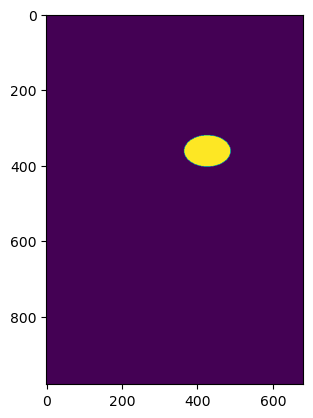

In [74]:
left_eye = left_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(left_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(left_eye_mask)
plt.show()

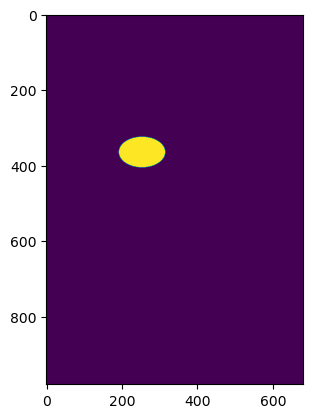

In [69]:
right_eye = right_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(right_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(right_eye_mask)
plt.show()

In [84]:
left_eye = left_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_center = int(x + w/2), int(y + h/2)
left_eye_center

(357, 390)

In [96]:
right_eye = right_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_center = int(x + w/2), int(y-5 + h/2)
right_eye_center

(212, 399)

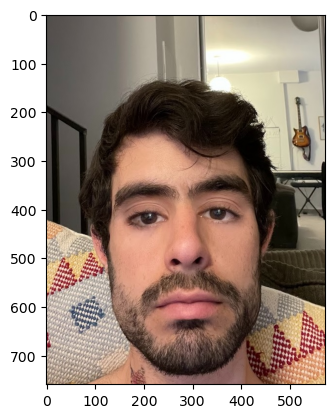

In [97]:
blend = cv2.seamlessClone(opened, closed1, left_eye_mask, left_eye_center, cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(opened, blend, right_eye_mask, right_eye_center, cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()

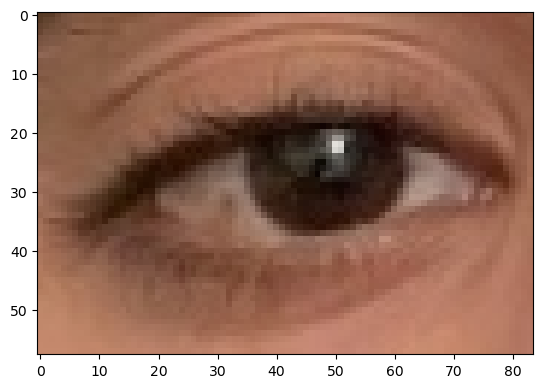

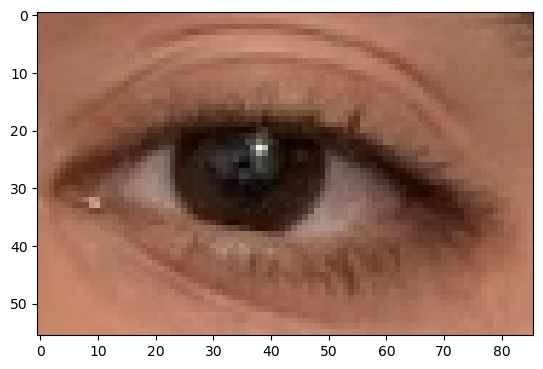

In [135]:
right_eye = cv2.cvtColor(cv2.imread(datadir+'/right/brown_1.jpg'), cv2.COLOR_BGR2RGB)
h, w = right_eye.shape[:2]
right_eye = cv2.resize(right_eye, (int(w * 0.8), int(h * 0.8)))
left_eye = cv2.cvtColor(cv2.imread(datadir+'/left/brown_1.jpg'), cv2.COLOR_BGR2RGB)
h, w = left_eye.shape[:2]
left_eye = cv2.resize(left_eye, (int(w * 0.8), int(h * 0.8)))
plt.imshow(right_eye)
plt.show()
plt.imshow(left_eye)
plt.show()

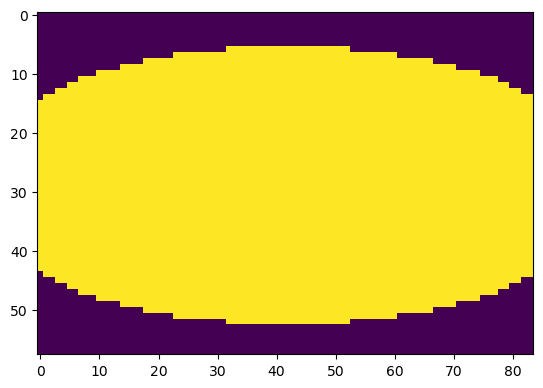

In [136]:
right_eye_mask = np.zeros(right_eye.shape[:2], dtype=np.uint8)
cx, cy = right_eye.shape[1]/2, right_eye.shape[0]/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(right_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(right_eye_mask)
plt.show()

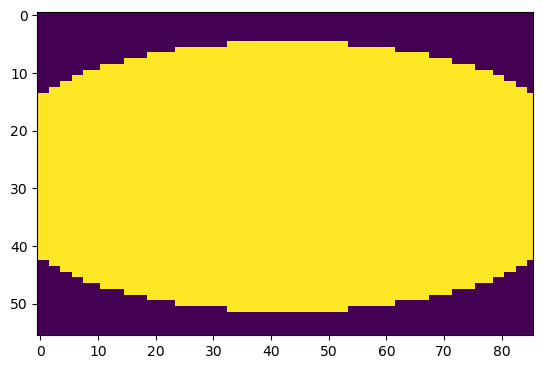

In [137]:
left_eye_mask = np.zeros(left_eye.shape[:2], dtype=np.uint8)
cx, cy = left_eye.shape[1]/2, left_eye.shape[0]/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(left_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(left_eye_mask)
plt.show()

In [141]:
left_eye_closed = left_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = max(non_max_suppression(left_eye_closed), key=lambda x: x[0])
left_eye_center = int(x + w/2), int(y+10 + h/2)
left_eye_center

(357, 400)

In [144]:
right_eye_closed = right_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = min(non_max_suppression(right_eye_closed), key=lambda x: x[0])
right_eye_center = int(x + w/2), int(y+10 + h/2)
right_eye_center

(212, 414)

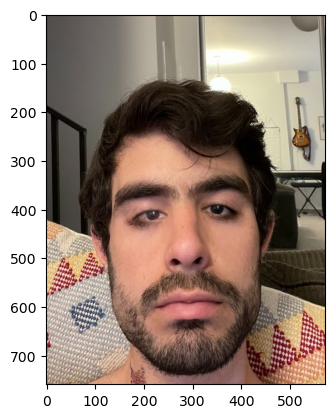

In [145]:
blend = cv2.seamlessClone(left_eye, closed1, left_eye_mask, left_eye_center, cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(right_eye, blend, right_eye_mask, right_eye_center, cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()

In [2]:
open_eyes_pics = []
open_eyes_pics.append(cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2RGB))
# open_eyes_pics.append(imutils.rotate(cv2.cvtColor(cv2.imread(datadir+'/open/IMG_2353.jpg'), cv2.COLOR_BGR2RGB), 5))
# open_eyes_pics.append(cv2.cvtColor(cv2.imread(datadir+'/open/IMG_3666.jpg'), cv2.COLOR_BGR2RGB))

closed_eyes_pics = []
# closed_eyes_pics.append(imutils.rotate(cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2RGB), -3))
# closed_eyes_pics.append(cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2RGB))
closed_eyes_pics.append(cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_4752.jpg'), cv2.COLOR_BGR2RGB))
# closed_eyes_pics.append(cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_4762.jpg'), cv2.COLOR_BGR2RGB))

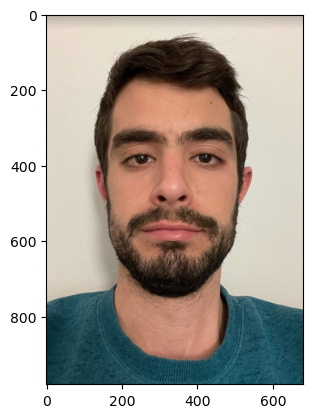

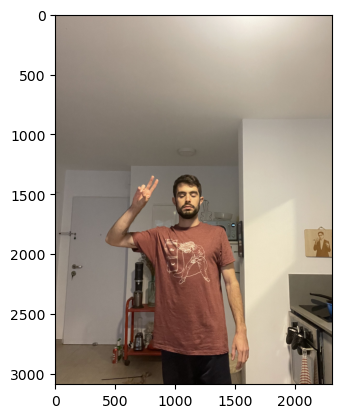

In [3]:
open_image = open_eyes_pics[0]
closed_image = closed_eyes_pics[0]

# open_image = match_histograms(open_image, closed_image, channel_axis=-1)

plt.imshow(open_image)
plt.show()
plt.imshow(closed_image)
plt.show()

In [4]:
FACIAL_LANDMARK_PREDICTOR = '../../models/shape_predictor.dat'  
MINIMUM_EAR = 0.2

In [5]:
faceDetector = dlib.get_frontal_face_detector()
landmarkFinder = dlib.shape_predictor(FACIAL_LANDMARK_PREDICTOR)

In [6]:
(leftEyeStart, leftEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rightEyeStart, rightEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [ ]:
def eye_aspect_ratio(eye):
    p2_minus_p6 = dist.euclidean(eye[1], eye[5])
    p3_minus_p5 = dist.euclidean(eye[2], eye[4])
    p1_minus_p4 = dist.euclidean(eye[0], eye[3])
    ear = (p2_minus_p6 + p3_minus_p5) / (2.0 * p1_minus_p4)
    return ear

def centroid(eye):
    return int(sum(eye[:, 0] / len(eye[:, ]))), int(sum(eye[:, 1] / len(eye[:, ])))

In [ ]:
face_sizes = []
for image in [closed_image, open_image]:
    faces = faceDetector(image, 0)
    # For now only support if and only if there is one face in the image.
    assert(len(faces) == 1)
    faceLandmarks = landmarkFinder(image, faces[0])
    faceLandmarks = face_utils.shape_to_np(faceLandmarks)
    face_sizes.append(dist.euclidean(faceLandmarks[0], faceLandmarks[16]))

scaling_factor = face_sizes[0] / face_sizes[1]
replacement = cv2.resize(open_image, None, fx=scaling_factor, fy=scaling_factor)

eyes = []
for image in [closed_image, replacement]:
    faces = faceDetector(image, 0)
    # For now only support if and only if there is one face in the image.
    assert(len(faces) == 1)
    faceLandmarks = landmarkFinder(image, faces[0])
    faceLandmarks = face_utils.shape_to_np(faceLandmarks)
    leftEye = faceLandmarks[leftEyeStart:leftEyeEnd]
    rightEye = faceLandmarks[rightEyeStart:rightEyeEnd]
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)
    
    diff_left_1 = np.int32((faceLandmarks[23] * 0.35 + faceLandmarks[43] * 0.65) - faceLandmarks[43])
    diff_left_2 = np.int32((faceLandmarks[24] * 0.35 + faceLandmarks[44] * 0.65) - faceLandmarks[44])
    diff_left_3 = np.int32((faceLandmarks[27] * 0.35 + faceLandmarks[42] * 0.65) - faceLandmarks[42])
    diff_right_1 = np.int32((faceLandmarks[19] * 0.35 + faceLandmarks[37] * 0.65) - faceLandmarks[37])
    diff_right_2 = np.int32((faceLandmarks[20] * 0.35 + faceLandmarks[38] * 0.65) - faceLandmarks[38])
    diff_right_3 = np.int32((faceLandmarks[27] * 0.35 + faceLandmarks[39] * 0.65) - faceLandmarks[39])

    leftEye[0] = leftEye[0] + diff_left_3
    leftEye[1] = leftEye[1] + diff_left_1
    leftEye[2] = leftEye[2] + diff_left_2
    leftEye[3] = leftEye[3] - diff_left_3
    leftEye[4] = leftEye[4] - diff_left_2
    leftEye[5] = leftEye[5] - diff_left_1
    
    rightEye[0] = rightEye[0] - diff_right_3
    rightEye[1] = rightEye[1] + diff_right_1
    rightEye[2] = rightEye[2] + diff_right_2
    rightEye[3] = rightEye[3] + diff_right_3
    rightEye[4] = rightEye[4] - diff_right_2
    rightEye[5] = rightEye[5] - diff_right_1
    
    left_centroid = (np.int32(centroid(leftEye)[0] * 0.85 + faceLandmarks[24][0] * 0.15), np.int32(centroid(leftEye)[1] * 0.85 + faceLandmarks[24][1] * 0.15))
    right_centroid = (np.int32(centroid(rightEye)[0] * 0.85 + faceLandmarks[19][0] * 0.15), np.int32(centroid(rightEye)[1] * 0.85 + faceLandmarks[19][1] * 0.15))
    
    eyes.append([
        {
            "kind": "left",
            "EAR": leftEAR,
            "status": "closed" if leftEAR < MINIMUM_EAR else "open",
            "centroid": left_centroid if leftEAR < MINIMUM_EAR else centroid(leftEye),
            "coordinates": leftEye,
        },
        {
            "kind": "right",
            "EAR": rightEAR,
            "status": "closed" if rightEAR < MINIMUM_EAR else "open",
            "centroid": right_centroid if rightEAR < MINIMUM_EAR else centroid(rightEye),
            "coordinates": rightEye,
        },
    ])
    
print(eyes)

[[{'kind': 'left', 'EAR': 0.1394062670932132, 'status': 'closed', 'centroid': (1152, 1514), 'coordinates': array([[1123, 1514],
       [1144, 1505],
       [1159, 1506],
       [1177, 1526],
       [1157, 1541],
       [1147, 1538]])}, {'kind': 'right', 'EAR': 0.13284962891742577, 'status': 'closed', 'centroid': (1059, 1516), 'coordinates': array([[1034, 1530],
       [1053, 1508],
       [1068, 1507],
       [1089, 1514],
       [1066, 1540],
       [1056, 1543]])}], [{'kind': 'left', 'EAR': 0.2933486193301547, 'status': 'open', 'centroid': (241, 221), 'coordinates': array([[210, 217],
       [233, 200],
       [250, 200],
       [271, 227],
       [249, 242],
       [236, 240]])}, {'kind': 'right', 'EAR': 0.31262938943499446, 'status': 'open', 'centroid': (142, 221), 'coordinates': array([[115, 228],
       [133, 201],
       [151, 200],
       [173, 218],
       [149, 241],
       [136, 243]])}]]


In [ ]:
left_eye_mask = np.zeros(replacement.shape[:2], dtype=np.uint8) 
# cv2.fillPoly(left_eye_mask, [eyes[1][0]['coordinates']], color=255)
major_axis = (abs(eyes[1][0]['coordinates'][0][0] - eyes[1][0]['coordinates'][3][0])) / 2
minor_axis = (abs(eyes[1][0]['coordinates'][2][1] - eyes[1][0]['coordinates'][4][1])) / 2
cv2.ellipse(left_eye_mask, (int(eyes[1][0]['centroid'][0]), int(eyes[1][0]['centroid'][1])), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
left_eye_mask_3d = np.zeros_like(replacement)
left_eye_mask_3d[left_eye_mask == 255] = [1, 1, 1]
plt.imshow(replacement * left_eye_mask_3d)
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 2057 output values where the mask is true

In [ ]:
right_eye_mask = np.zeros(replacement.shape[:2], dtype=np.uint8) 
# cv2.fillPoly(right_eye_mask, [eyes[2][1]['coordinates']], color=255)
major_axis = (abs(eyes[1][1]['coordinates'][0][0] - eyes[1][1]['coordinates'][3][0])) / 2
minor_axis = (abs(eyes[1][1]['coordinates'][2][1] - eyes[1][1]['coordinates'][4][1])) / 2
cv2.ellipse(right_eye_mask, (int(eyes[1][1]['centroid'][0]), int(eyes[1][1]['centroid'][1])), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
right_eye_mask_3d = np.zeros_like(replacement)
right_eye_mask_3d[right_eye_mask == 255] = [1, 1, 1]
plt.imshow(replacement * right_eye_mask_3d)
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 1895 output values where the mask is true

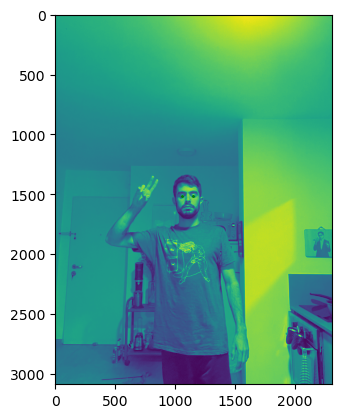

In [ ]:
plt.imshow(closed_image)
plt.plot(eyes[0][0]['centroid'][0], eyes[0][0]['centroid'][1], "og", markersize=1)
plt.plot(eyes[0][1]['centroid'][0], eyes[0][1]['centroid'][1], "og", markersize=1)
plt.show()

In [ ]:
blend = cv2.seamlessClone(replacement, closed_image, left_eye_mask, eyes[0][0]['centroid'], cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(replacement, blend, right_eye_mask, eyes[0][1]['centroid'], cv2.NORMAL_CLONE)
plt.rcParams["figure.figsize"] = (50,10)
plt.imshow(blend)
plt.show()
cv2.imwrite('blend.jpg', cv2.cvtColor(blend, cv2.COLOR_RGB2BGR));

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:792: error: (-215:Assertion failed) !_src.empty() in function 'cv::Laplacian'


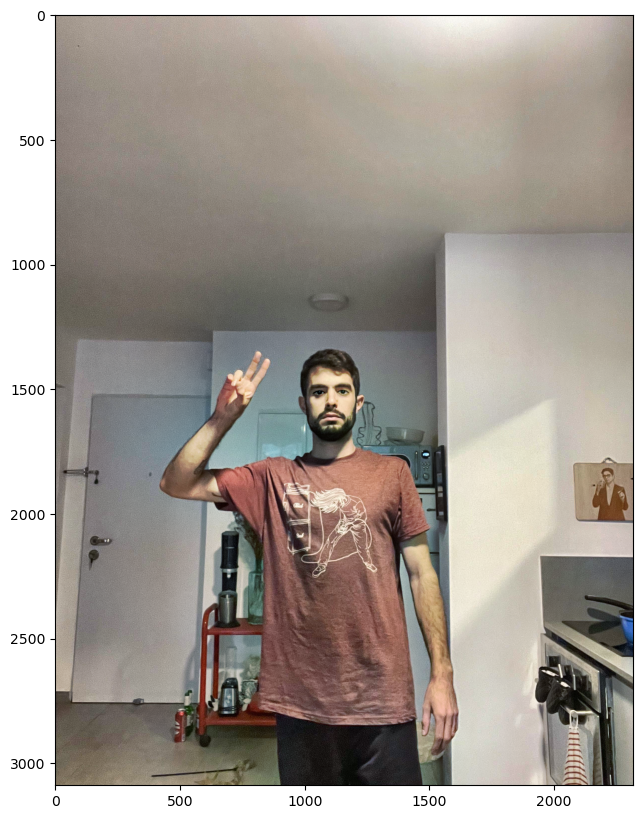

In [67]:
b, g, r = cv2.split(blend)

# Apply the contrast adjustment to each color channel
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
b_contrast = clahe.apply(b)
g_contrast = clahe.apply(g)
r_contrast = clahe.apply(r)

# Merge the color channels back into an image
img_contrast = cv2.merge((b_contrast, g_contrast, r_contrast))
plt.imshow(img_contrast)
plt.show()

In [6]:
import sys  
sys.path.insert(0, '../../src')
import replacer

[[[186 176 166]
  [185 175 165]
  [185 175 165]
  ...
  [189 178 168]
  [189 176 167]
  [189 176 167]]

 [[185 175 165]
  [184 174 164]
  [184 174 164]
  ...
  [190 179 169]
  [191 178 169]
  [191 178 169]]

 [[189 179 169]
  [187 177 167]
  [185 175 165]
  ...
  [193 181 170]
  [193 181 170]
  [193 181 170]]

 ...

 [[ 11  54  63]
  [  9  52  61]
  [ 13  56  65]
  ...
  [ 17  73  85]
  [ 10  66  78]
  [ 18  74  86]]

 [[ 16  59  68]
  [  9  52  61]
  [  9  52  61]
  ...
  [ 17  73  85]
  [ 24  81  92]
  [ 22  79  90]]

 [[ 11  54  63]
  [ 13  56  65]
  [ 18  61  70]
  ...
  [ 17  73  85]
  [ 33  90 101]
  [ 27  84  95]]]


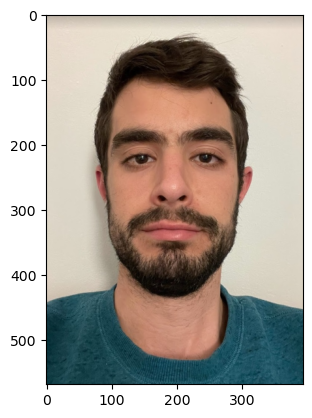

In [9]:
faces = faceDetector(closed_image, 0)
faceLandmarks = face_utils.shape_to_np(landmarkFinder(closed_image, faces[0]))
script_blend = replacer.replace_inner(open_image, closed_image, faceLandmarks, landmarkFinder)

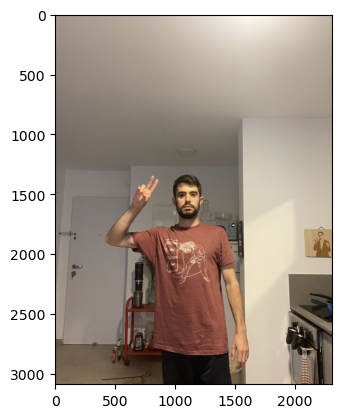

In [8]:
cv2.imwrite('blend1.jpg', cv2.cvtColor(script_blend, cv2.COLOR_RGB2BGR))
plt.imshow(script_blend)
plt.show()

In [3]:
import sys  
sys.path.insert(0, '../../')
import main

In [ ]:
%run -i ../../main.py --target-path=../../data/closed/IMG_4752.jpg --replacement-path=../../data/open